<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/2_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from tensorflow.keras.datasets import mnist

# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
# Check to see if we're using GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8139234666158512019
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14378926080
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15719674920450037831
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [22]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


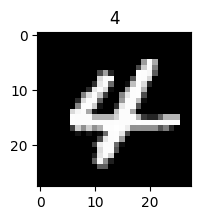

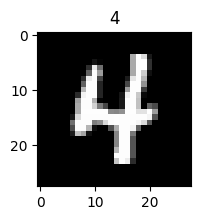

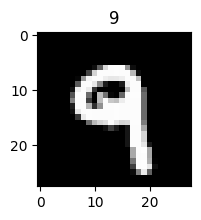

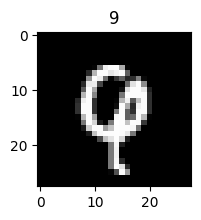

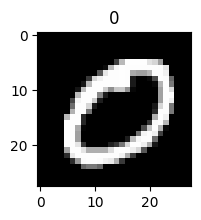

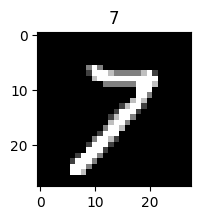

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title, image=None, size=6):
  if image.any():
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
  else:
    print("Image not found")


# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  title = y_train[random_num]
  imshow(title, img, size=2)

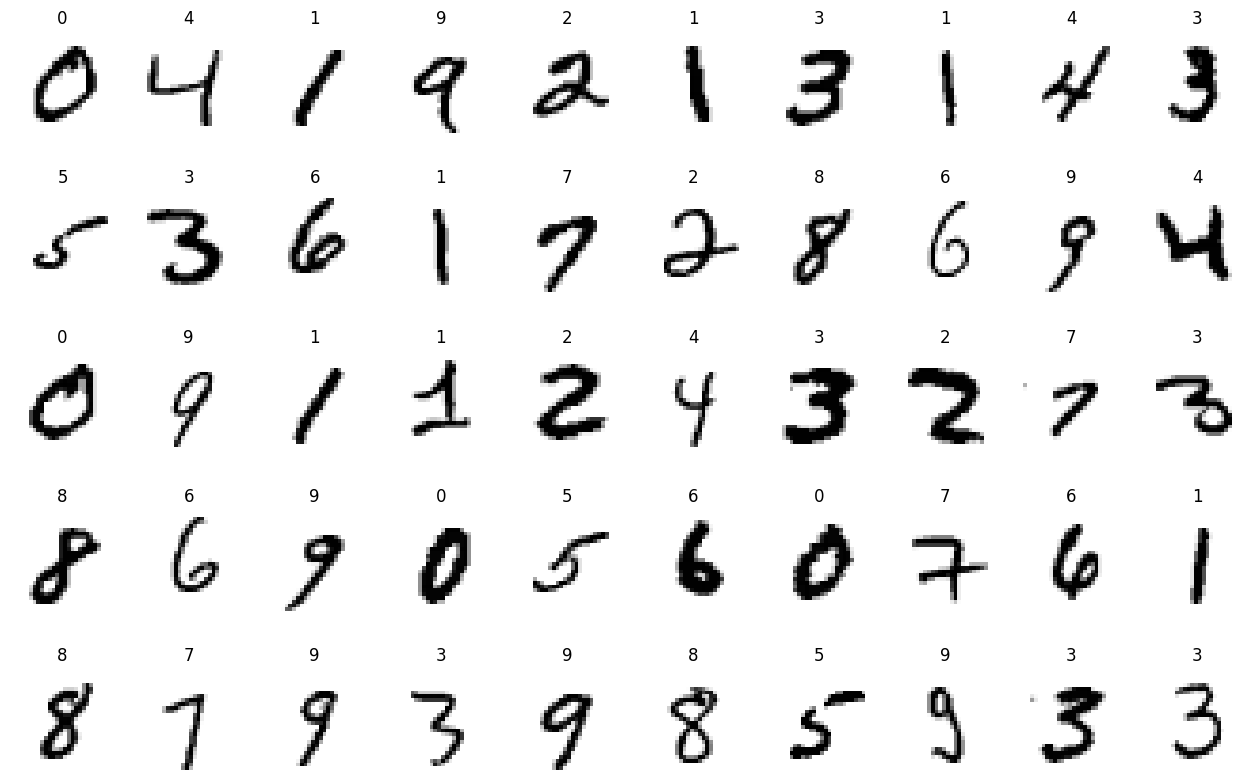

In [24]:
#figure = plt.figure()
plt.figure(figsize=(16,10))

num_images = 50

for index in range(1, num_images+1):
  plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
  plt.axis('off')
  plt.imshow(x_train[index], cmap='gray_r')

In [25]:
# Preprocess the data
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Add an extra dimension to the data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

# change datatype to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data to 0 - 1 range
x_train /= 255.0
x_test /= 255.0



In [28]:
from tensorflow.keras.utils import to_categorical

# Onehot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(0.001), metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [32]:
batch_size = 128
epochs = 25

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test,y_test))


Epoch 1/25
469/469 [==============================] - 15s 9ms/step - loss: 2.2171 - accuracy: 0.3316 - val_loss: 2.0699 - val_accuracy: 0.5730
Epoch 2/25
469/469 [==============================] - 4s 8ms/step - loss: 1.6373 - accuracy: 0.6947 - val_loss: 1.0141 - val_accuracy: 0.8063
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7010 - accuracy: 0.8347 - val_loss: 0.4975 - val_accuracy: 0.8699
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4543 - accuracy: 0.8752 - val_loss: 0.3885 - val_accuracy: 0.8929
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3814 - accuracy: 0.8916 - val_loss: 0.3416 - val_accuracy: 0.9051
Epoch 6/25
469/469 [==============================] - 5s 10ms/step - loss: 0.3436 - accuracy: 0.9012 - val_loss: 0.3140 - val_accuracy: 0.9117
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3183 - accuracy: 0.9074 - val_loss: 0.2924 - val_accuracy: 0.9173
Epoc

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9531000256538391
